In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('data/cifar-10-batches-py/data_batch_1', 'rb') as f:
    X = pickle.load(f, encoding='latin1')

In [3]:
X = X['data']

In [4]:
X.shape

(10000, 3072)

In [5]:
X = X.reshape(-1, 3, 32, 32)
print(X.shape)

(10000, 3, 32, 32)


In [6]:
# (n, 3, 32, 32) -> (n, 32, 32, 3)
X = X.transpose(0, 2, 3, 1)
print(X.shape)

(10000, 32, 32, 3)


In [7]:
X = X.reshape(-1, 32*32*3)
print(X.shape)

(10000, 3072)


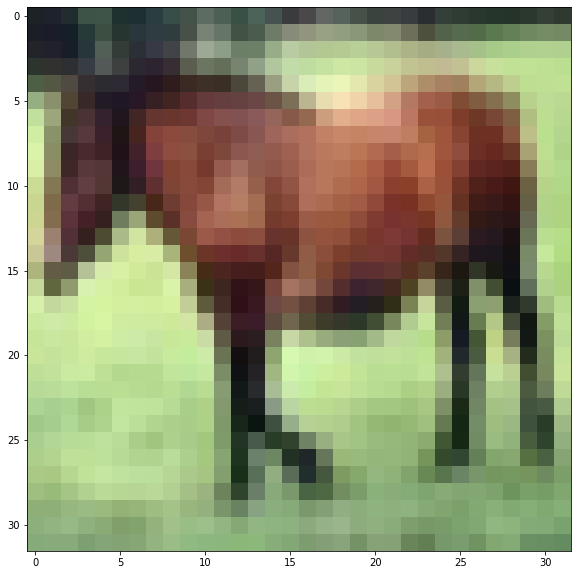

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(X[7].reshape(32, 32, 3));

In [9]:
X.mean(axis=0).shape

(3072,)

In [10]:
X = X - X.mean(axis=0)

In [11]:
np.std(X, axis=0).shape

(3072,)

In [12]:
X = X / np.std(X, axis=0)

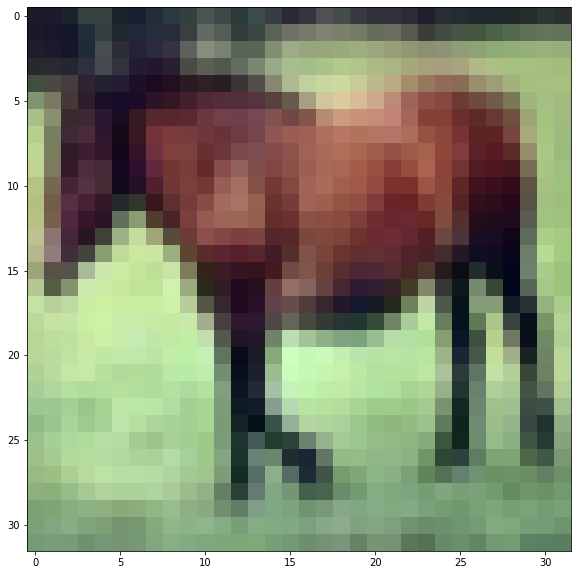

In [14]:
def show(i):
    i = i.reshape(32, 32, 3)
    m, M = i.min(), i.max()

    plt.figure(figsize=(10, 10))
    plt.imshow((i - m) / (M - m))
    plt.show();

show(X[7])

# ZCA Whitening

In [15]:
covariance_matrix = np.cov(X, rowvar=True)

In [16]:
covariance_matrix.shape

(10000, 10000)

In [17]:
U, S, V = np.linalg.svd(covariance_matrix)

In [18]:
print(U.shape, S.shape, V.shape)

(10000, 10000) (10000,) (10000, 10000)


In [19]:
epsilon = 1e-5
zca_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S + epsilon)), U.T))

In [20]:
zca_matrix.shape

(10000, 10000)

In [21]:
zca = np.dot(zca_matrix, X)

In [22]:
zca.shape

(10000, 3072)

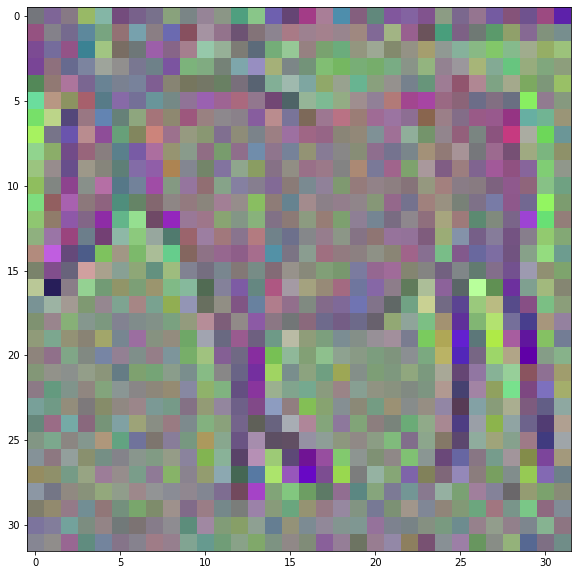

In [23]:
show(zca[7])